possible problems checked to avoid overfitting:
1. lags - (without using lags the r2 score dropped significantly)
2. train/test split problems (tried to divide by index, using train_test_split and time_series_split)


### Loading the data


In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/praksa_manu/distilroberta_model_training/predicted.csv'

data = pd.read_csv(path)

data.head(10)

,Date,Tweet,Stock Name,Company Name,Close,Predictions
0,9/29/2022,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",268.209992,neutral
1,9/29/2022,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",268.209992,neutral
2,9/29/2022,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",268.209992,neutral
3,9/29/2022,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",268.209992,neutral
4,9/29/2022,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",268.209992,neutral
5,9/29/2022,@RealDanODowd @Tesla This is you https://t.co/...,TSLA,"Tesla, Inc.",268.209992,neutral
6,9/29/2022,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",268.209992,neutral
7,9/29/2022,$NIO just because I'm down money doesn't mean ...,TSLA,"Tesla, Inc.",268.209992,positive
8,9/29/2022,50 likes for some $SPY $TSLA charts to study!\...,TSLA,"Tesla, Inc.",268.209992,neutral
9,9/29/2022,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,TSLA,"Tesla, Inc.",268.209992,neutral


In [3]:
data.rename(columns={"Predictions": "Category"}, inplace=True)

### Exapnding feature domain
We will implement lags for the Close column for previous 5 days.

In [4]:
for i in range(1, 6):
    data[f'Close_lag_{i}'] = data['Close'].shift(i)

data = data.dropna()

In [5]:
data.isnull().sum()

,0
Date,0
Tweet,0
Stock Name,0
Company Name,0
Close,0
Category,0
Close_lag_1,0
Close_lag_2,0
Close_lag_3,0
Close_lag_4,0


### Applying date transformation

We will split the values of the 'Date' column into month and year to have better approach. Then we will apply sine and cosine transformation to this values.

In [6]:
import numpy as np

In [7]:
def split_date(row):
    month, day, year = row['Date'].split('/')

    return pd.Series({'Month': int(month), 'Year': int(year)})

In [8]:
data[['Month', 'Year']] = data.apply(split_date, axis=1)

In [9]:
data.head(10)

,Date,Tweet,Stock Name,Company Name,Close,Category,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Month,Year
5,9/29/2022,@RealDanODowd @Tesla This is you https://t.co/...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
6,9/29/2022,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
7,9/29/2022,$NIO just because I'm down money doesn't mean ...,TSLA,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
8,9/29/2022,50 likes for some $SPY $TSLA charts to study!\...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
9,9/29/2022,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
10,9/29/2022,"Tomorrow, Tesla, $TSLA, AI day 2 is ongoing.\r...",TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
11,9/29/2022,Powerwall FTW! https://t.co/GWAaXXCrYv,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
12,9/29/2022,$TSLAQ: Tesla’s dead in Europe! Everyone else ...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
13,9/29/2022,The irony is so thick you can cut it with a kn...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
14,9/29/2022,Tesla AI day in 24 hours. Are you ready? $TSLA...,TSLA,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022


In [10]:
def sine_transform(value, max_value):

    return np.sin(2 * np.pi * value / max_value)

In [11]:
def cosine_transform(value, max_value):

    return np.cos(2 * np.pi * value / max_value)

In [12]:
data['Month_Sin'] = data['Month'].apply(lambda x: sine_transform(x, 12))

In [13]:
data['Month_Cos'] = data['Month'].apply(lambda x: cosine_transform(x, 12))

In [14]:
max_year = data['Year'].max()

data['Year_Sin'] = data['Year'].apply(lambda x: sine_transform(x, max_year))

In [15]:
data['Year_Cos'] = data['Year'].apply(lambda x: cosine_transform(x, max_year))

In [16]:
data.head(10)

,Date,Tweet,Stock Name,Company Name,Close,Category,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Month,Year,Month_Sin,Month_Cos,Year_Sin,Year_Cos
5,9/29/2022,@RealDanODowd @Tesla This is you https://t.co/...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
6,9/29/2022,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
7,9/29/2022,$NIO just because I'm down money doesn't mean ...,TSLA,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
8,9/29/2022,50 likes for some $SPY $TSLA charts to study!\...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
9,9/29/2022,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
10,9/29/2022,"Tomorrow, Tesla, $TSLA, AI day 2 is ongoing.\r...",TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
11,9/29/2022,Powerwall FTW! https://t.co/GWAaXXCrYv,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
12,9/29/2022,$TSLAQ: Tesla’s dead in Europe! Everyone else ...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
13,9/29/2022,The irony is so thick you can cut it with a kn...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
14,9/29/2022,Tesla AI day in 24 hours. Are you ready? $TSLA...,TSLA,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0


To avoid redundancy we will drop columns 'Date', 'Month' and 'Year'.

In [17]:
data.drop(columns=['Date', 'Year', 'Month'], inplace=True)

data.head(10)

,Tweet,Stock Name,Company Name,Close,Category,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Month_Sin,Month_Cos,Year_Sin,Year_Cos
5,@RealDanODowd @Tesla This is you https://t.co/...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
6,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
7,$NIO just because I'm down money doesn't mean ...,TSLA,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
8,50 likes for some $SPY $TSLA charts to study!\...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
9,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
10,"Tomorrow, Tesla, $TSLA, AI day 2 is ongoing.\r...",TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
11,Powerwall FTW! https://t.co/GWAaXXCrYv,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
12,$TSLAQ: Tesla’s dead in Europe! Everyone else ...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
13,The irony is so thick you can cut it with a kn...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
14,Tesla AI day in 24 hours. Are you ready? $TSLA...,TSLA,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0


### Converting metrics


Because in the previous tasks we added sentiment column while preprocessing the 'Tweet' column and applying the sentiment to the datset in this task we do not need it.

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [19]:
data.drop(columns=['Tweet'], inplace=True)

In [20]:
len(data['Stock Name'].unique())

25

In [21]:
sn_encoder = LabelEncoder()

In [22]:
data['Stock Name'] = sn_encoder.fit_transform(data['Stock Name'])

In [23]:
sn_scaler = MinMaxScaler()

data['Stock Name'] = sn_scaler.fit_transform(data[['Stock Name']])

In [24]:
data.head(10)

,Stock Name,Company Name,Close,Category,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Month_Sin,Month_Cos,Year_Sin,Year_Cos
5,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
6,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
7,0.833333,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
8,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
9,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
10,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
11,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
12,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
13,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
14,0.833333,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0


In [25]:
len(data['Company Name'].unique())

25

In [26]:
cn_encoder = LabelEncoder()

In [27]:
data['Company Name'] = cn_encoder.fit_transform(data['Company Name'])

In [28]:
cn_scaler = MinMaxScaler()

data['Company Name'] = cn_scaler.fit_transform(data[['Company Name']])

In [29]:
data.head(10)

,Stock Name,Company Name,Close,Category,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Month_Sin,Month_Cos,Year_Sin,Year_Cos
5,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
6,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
7,0.833333,0.75,268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
8,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
9,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
10,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
11,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
12,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
13,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
14,0.833333,0.75,268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0


In [30]:
close_scaler = MinMaxScaler()

data['Close'] = close_scaler.fit_transform(data[['Close']])

In [31]:
def encode_sentiment(row):
    if row['Category'] == 'positive':
        return 1
    elif row['Category'] == 'negative':
        return -1
    else:
        return 0


data['Category'] = data.apply(encode_sentiment, axis=1)

In [32]:
"""data['Close_lag_1'] = close_scaler.fit_transform(data[['Close_lag_1']])
data['Close_lag_2'] = close_scaler.fit_transform(data[['Close_lag_2']])
data['Close_lag_3'] = close_scaler.fit_transform(data[['Close_lag_3']])
data['Close_lag_4'] = close_scaler.fit_transform(data[['Close_lag_4']])
data['Close_lag_5'] = close_scaler.fit_transform(data[['Close_lag_5']])"""

"data['Close_lag_1'] = close_scaler.fit_transform(data[['Close_lag_1']])\ndata['Close_lag_2'] = close_scaler.fit_transform(data[['Close_lag_2']])\ndata['Close_lag_3'] = close_scaler.fit_transform(data[['Close_lag_3']])\ndata['Close_lag_4'] = close_scaler.fit_transform(data[['Close_lag_4']])\ndata['Close_lag_5'] = close_scaler.fit_transform(data[['Close_lag_5']])"

In [33]:
data.head(10)

,Stock Name,Company Name,Close,Category,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Month_Sin,Month_Cos,Year_Sin,Year_Cos
5,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
6,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
7,0.833333,0.75,0.377748,1,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
8,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
9,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
10,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
11,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
12,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
13,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
14,0.833333,0.75,0.377748,1,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0


### Dividing dataset into subsets

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X, y = data.drop(columns=['Close']), data['Close']

In [36]:
train_size = int(len(data) * 0.8)
X = data.drop(columns=['Close'])
y = data['Close']

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [37]:
print(X)

       Stock Name  Company Name  Category  Close_lag_1  Close_lag_2  \
5        0.833333      0.750000         0   268.209992   268.209992   
6        0.833333      0.750000         0   268.209992   268.209992   
7        0.833333      0.750000         1   268.209992   268.209992   
8        0.833333      0.750000         0   268.209992   268.209992   
9        0.833333      0.750000         0   268.209992   268.209992   
...           ...           ...       ...          ...          ...   
80788    0.958333      0.958333         0    37.419998    37.419998   
80789    0.958333      0.958333         1    38.259998    37.419998   
80790    0.958333      0.958333         0    34.110001    38.259998   
80791    0.958333      0.958333         1    35.459999    34.110001   
80792    0.958333      0.958333         1    35.459999    35.459999   

       Close_lag_3  Close_lag_4  Close_lag_5  Month_Sin     Month_Cos  \
5       268.209992   268.209992   268.209992  -1.000000 -1.836970e-16   
6

In [38]:
print(y)

5        0.377748
6        0.377748
7        0.377748
8        0.377748
9        0.377748
           ...   
80788    0.039864
80789    0.033766
80790    0.035750
80791    0.035750
80792    0.035868
Name: Close, Length: 80788, dtype: float64


In [39]:
print(X_test, y_test)

       Stock Name  Company Name  Category  Close_lag_1  Close_lag_2  \
64635    0.875000      0.708333         0    81.510002    81.510002   
64636    0.875000      0.708333         0    81.510002    81.510002   
64637    0.875000      0.708333         0    81.510002    81.510002   
64638    0.875000      0.708333         1    81.510002    81.510002   
64639    0.875000      0.708333         0    81.510002    81.510002   
...           ...           ...       ...          ...          ...   
80788    0.958333      0.958333         0    37.419998    37.419998   
80789    0.958333      0.958333         1    38.259998    37.419998   
80790    0.958333      0.958333         0    34.110001    38.259998   
80791    0.958333      0.958333         1    35.459999    34.110001   
80792    0.958333      0.958333         1    35.459999    35.459999   

       Close_lag_3  Close_lag_4  Close_lag_5  Month_Sin     Month_Cos  \
64635    81.510002    81.510002    81.510002  -0.500000 -8.660254e-01   
6

### Training the model

In [46]:
!pip install --upgrade xgboost

In [47]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 28.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [48]:
!pip install scikit-learn==1.3.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 26.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [40]:
import xgboost as xgb
import sklearn

In [ ]:
print(xgboost.__version__)

NameError: name 'xgboost' is not defined

In [ ]:
print(sklearn.__version__)

In [47]:
model  = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    booster='gblinear'
)

In [48]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [49]:
preds = model.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [51]:
def print_results(y_test, preds):
  y_test_scaled = close_scaler.inverse_transform(y_test.values.reshape(-1, 1))
  preds_scaled = close_scaler.inverse_transform(preds.reshape(-1, 1))

  print("RESULTS OF PREDICTING CLOSE COLUMN USING XGBOOST MODEL \n")
  print(f"Mean squared error of the Close prediction is: {mean_squared_error(y_test_scaled, preds_scaled)}")
  print(f"Mean absolute error of the Close prediction is: {mean_absolute_error(y_test_scaled, preds_scaled)}")
  print(f"R2 score of the Close prediction is: {r2_score(y_test_scaled, preds_scaled)}")

The results below are from training the same model using lags from previous 5 days, also by using train_test_split object.

In [52]:
print_results(y_test, preds)

RESULTS OF PREDICTING CLOSE COLUMN USING XGBOOST MODEL 

Mean squared error of the Close prediction is: 3552.5207878007577
Mean absolute error of the Close prediction is: 56.74709877763207
R2 score of the Close prediction is: 0.49342609244693947


The results below are from training the same model without lags using train_test_split_object

In [ ]:
model.fit(X_train, y_train)

preds = model.predict(X_test)

print_results(y_test, preds)

RESULTS OF PREDICTING CLOSE COLUMN USING XGBOOST MODEL 

Mean squared error of the Close prediction is: 35796.08135728018
Mean absolute error of the Close prediction is: 110.40202184618431
R2 score of the Close prediction is: -4.104642438122249


### Plotting the results

In [53]:
import matplotlib.pyplot as plt
import numpy as np

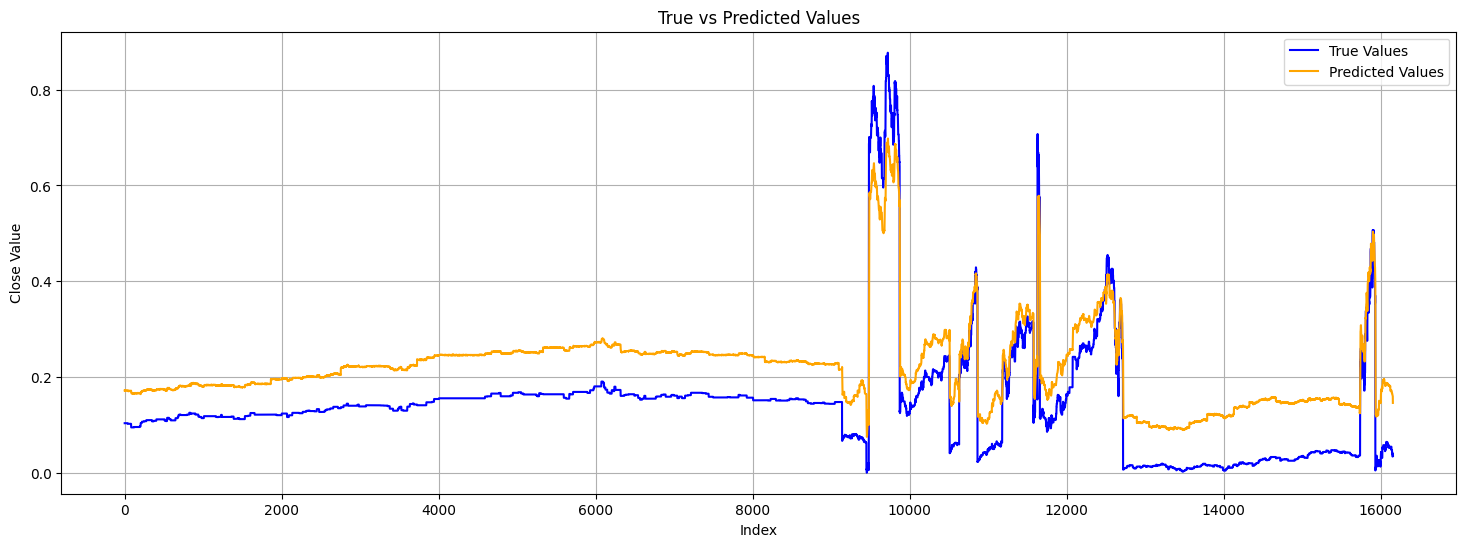

In [54]:
indices = np.arange(len(y_test))

plt.figure(figsize=(18, 6))

plt.plot(indices, y_test, label='True Values', color='blue')

plt.plot(indices, preds, label='Predicted Values', color='orange')

plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Value')
plt.legend()
plt.grid(True)
plt.show()

### Using TimeSeriesSplit object from Sklearn

In [ ]:
X, y = data.drop(columns=['Close']), data['Close']

In [ ]:
print(X)

       Stock Name  Company Name  Category  Month_Sin     Month_Cos  \
0        0.833333      0.750000         0  -1.000000 -1.836970e-16   
1        0.833333      0.750000         0  -1.000000 -1.836970e-16   
2        0.833333      0.750000         0  -1.000000 -1.836970e-16   
3        0.833333      0.750000         0  -1.000000 -1.836970e-16   
4        0.833333      0.750000         0  -1.000000 -1.836970e-16   
...           ...           ...       ...        ...           ...   
80788    0.958333      0.958333         0  -0.866025  5.000000e-01   
80789    0.958333      0.958333         1  -0.866025  5.000000e-01   
80790    0.958333      0.958333         0  -0.866025  5.000000e-01   
80791    0.958333      0.958333         1  -0.866025  5.000000e-01   
80792    0.958333      0.958333         1  -1.000000 -1.836970e-16   

           Year_Sin  Year_Cos  
0     -2.449294e-16  1.000000  
1     -2.449294e-16  1.000000  
2     -2.449294e-16  1.000000  
3     -2.449294e-16  1.000000  

In [ ]:
print(y)

0        0.377748
1        0.377748
2        0.377748
3        0.377748
4        0.377748
           ...   
80788    0.039864
80789    0.033766
80790    0.035750
80791    0.035750
80792    0.035868
Name: Close, Length: 80793, dtype: float64


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
model  = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [ ]:
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

In [ ]:
errors = []
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    errors.append(r2_score(y_test, predictions))

The results below are from training same model using lags from previous days, and using TimeSeriesSplit object.

In [ ]:
average_error = sum(errors) / len(errors)
print(f"Average R2_score of all splits: {average_error}")

Average R2_score of all splits: 0.6385370679400936


The results below are from training the same model without lags using TimeSeriesSplit object

In [ ]:
average_error = sum(errors) / len(errors)
print(f"Average R2_score of all splits: {average_error}")

Average R2_score of all splits: -1.5482989543091554


With lags

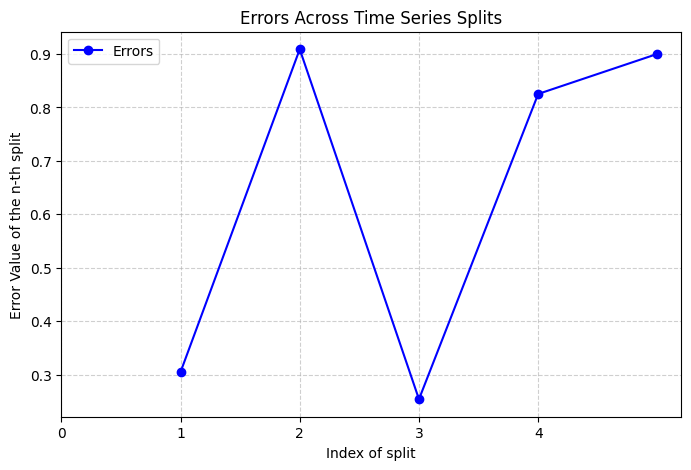

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(errors)+1), errors, marker='o', linestyle='-', color='b', label='Errors')

plt.xlabel('Index of split')
plt.ylabel('Error Value of the n-th split')
plt.title('Errors Across Time Series Splits')
plt.xticks(range(len(errors)))
plt.legend()


plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Without lags

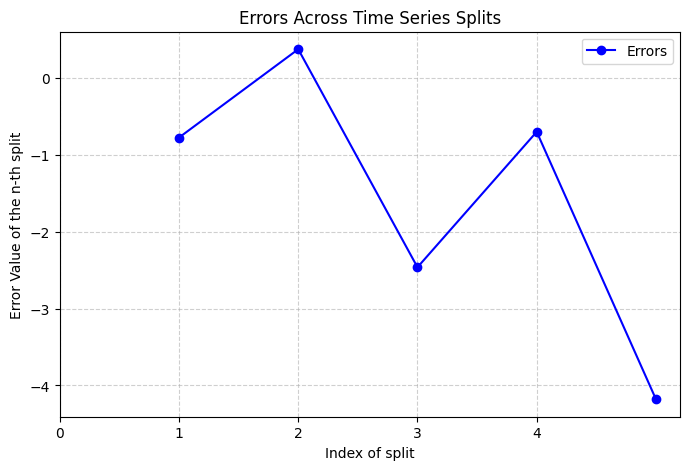

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(errors)+1), errors, marker='o', linestyle='-', color='b', label='Errors')

plt.xlabel('Index of split')
plt.ylabel('Error Value of the n-th split')
plt.title('Errors Across Time Series Splits')
plt.xticks(range(len(errors)))
plt.legend()


plt.grid(True, linestyle='--', alpha=0.6)
plt.show()